In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [76]:
data = pd.read_csv('../data/MOD13Q1_061/postprocessed/results.csv')

data['value'] = data.value * 0.0001 * 0.0001

reindex = dict(zip(data.wkt.unique(), range(data.wkt.nunique())))

data['pixelid'] = data.wkt.map(reindex)

data = data.drop('wkt',axis=1)

data['date'] = pd.to_datetime(data['date'])

base_year_value = data[data.date == data.date.min()].set_index('pixelid').value

data = data.set_index(['pixelid','date'])

In [77]:
data['basecomp'] = (data.value / base_year_value)

In [78]:
data.sort_values(['date','pixelid']).head()

,,value,basecomp
pixelid,date,,
0,2009-09-14,0.7328,1.0
1,2009-09-14,0.7731,1.0
2,2009-09-14,0.6646,1.0
3,2009-09-14,0.6394,1.0
4,2009-09-14,0.7272,1.0


In [79]:
data.shape

(2451414, 2)

In [80]:
data.dtypes

value       float64
basecomp    float64
dtype: object

In [81]:
data = data.set_index(['pixelid','date'])

KeyError: "None of ['pixelid', 'date'] are in the columns"

In [ ]:
data

In [82]:
data.sort_values('basecomp').dropna().head(100)

value    basecomp
pixelid date                          
201265  2011-09-14  0.2381 -238.100000
1197    2018-09-14  0.5396 -199.851852
201265  2020-09-13  0.1631 -163.100000
        2018-09-14  0.1469 -146.900000
252377  2011-09-14  0.4647  -94.836735
...                    ...         ...
5459    2013-09-14  0.4697   -3.223747
4909    2020-09-13  0.4415   -3.030199
        2013-09-14  0.4297   -2.949211
188630  2011-09-14 -0.1599   -2.665000
189181  2013-09-14 -0.1844   -2.626781

[100 rows x 2 columns]

<Axes: xlabel='value', ylabel='Count'>

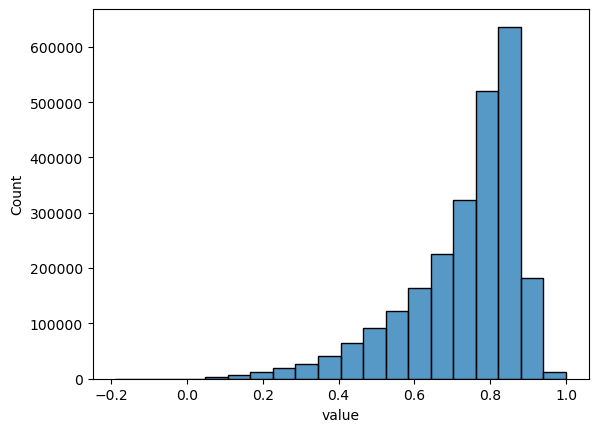

In [83]:
sns.histplot(x = 'value', bins = 20, data=data)

In [59]:
sns.scatterplot(x = 'value', y='basecomp', data = data)

AttributeError: 'tuple' object has no attribute 'min'

In [71]:
data.basecomp.mean(), data.basecomp.std()

(np.float64(1.0162524780497137), np.float64(0.46187152109882296))

<Axes: xlabel='date', ylabel='basecomp'>

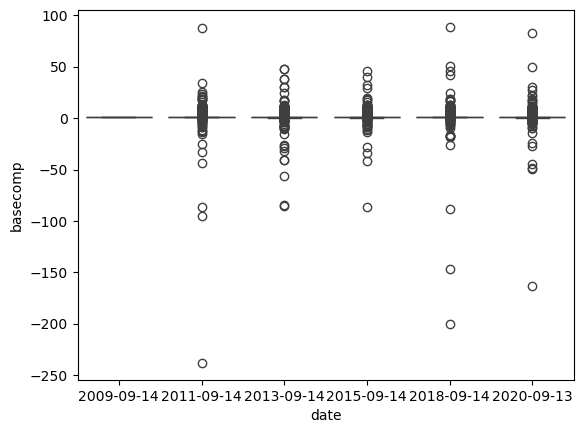

In [75]:
sns.boxplot(x = 'date', y = 'basecomp', data = data.sort_values('date'))

In [102]:
import pandas as pd

def mark_high_ndvi_pixels(df, value, threshold=1):
    """
    Marks pixels as 1 if their entire NDVI time series is > threshold, otherwise 0.

    Parameters:
    - df (pd.DataFrame): DataFrame with columns ['pixel_id', 'date', 'value'].
    - threshold (float): NDVI threshold to compare against (default is 1).

    Returns:
    - pd.DataFrame: DataFrame with 'pixel_id' and 'mark' (1 if all values > threshold, else 0).
    """
    # Group by pixel_id and check if all values are above threshold
    result = df.groupby('pixelid')[value].apply(lambda x: (x >= threshold).all()).astype(int).reset_index()
    result.rename(columns={value: 'mark'}, inplace=True)
    
    return result

In [103]:
marked = mark_high_ndvi_pixels(data, 'basecomp')

In [108]:
marked

,pixelid,mark
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
408564,408564,1
408565,408565,0
408566,408566,0
408567,408567,0


In [105]:
df = data.reset_index()

In [107]:
df[df.pixelid==2].sort_values('date')

,pixelid,date,value,basecomp
817140,2,2009-09-14,0.6646,1.000000
408571,2,2011-09-14,0.8060,1.212760
2042847,2,2013-09-14,0.6563,0.987511
2,2,2015-09-14,0.9124,1.372856
1225709,2,2018-09-14,0.8411,1.265573
1634278,2,2020-09-13,0.8490,1.277460
